In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
train_data=pd.read_csv("D:\\TEJAS FORMAT\\DS,ML,AI\\ANALYTICS VIDYA_JOBATHON\\Datasets\\train_data.csv")

In [4]:
test_data=pd.read_csv("D:\\TEJAS FORMAT\\DS,ML,AI\\ANALYTICS VIDYA_JOBATHON\\Datasets\\test_data.csv")

## Checking if any new values are there in test data:
## Here we check whether there are any same class both in train and test class or any new class has been added.


In [107]:
count=0
for col in train_data.columns:
    if col not in ["ID","Reco_Policy_Premium","Response"]:
        for val in test_data[col].unique():
            if val not in train_data[col].unique():
                print(col,val)
                count+=1

Region_Code 5232
Region_Code 5670
Region_Code 5764
Region_Code 5528
Region_Code 5207
Region_Code 4802
Region_Code 5339
Region_Code 5463
Region_Code 5716
Region_Code 5544
Region_Code 5788
Region_Code 5915
Region_Code 5917
Region_Code 5442
Region_Code 5920
Region_Code 4699
Region_Code 5404
Region_Code 5453
Region_Code 5926
Region_Code 5497
Region_Code 5573
Region_Code 5711
Region_Code 5018
Region_Code 5728
Region_Code 6117
Region_Code 5822
Region_Code 5727
Region_Code 5515
Region_Code 6046
Region_Code 6126
Region_Code 5642
Region_Code 6047
Region_Code 5773
Region_Code 5841
Region_Code 6072
Region_Code 5851
Region_Code 4811
Region_Code 6056
Region_Code 5211
Region_Code 4863
Region_Code 6068
Region_Code 5141
Region_Code 5684
Region_Code 6065
Region_Code 5595
Region_Code 5465
Region_Code 6184
Region_Code 5414
Region_Code 5867
Region_Code 5730
Region_Code 5695
Region_Code 5948
Region_Code 5872
Region_Code 6180
Region_Code 6040
Region_Code 6039
Region_Code 5702
Region_Code 5747
Region_Code 60

### Here, we got to know that Region code is having many new classes 

In [6]:
train_data["Region_Code"].nunique(),test_data["Region_Code"].nunique(),count

(5316, 4694, 225)

## There are total 225 new classes.

In [7]:
import seaborn as sns

<AxesSubplot:>

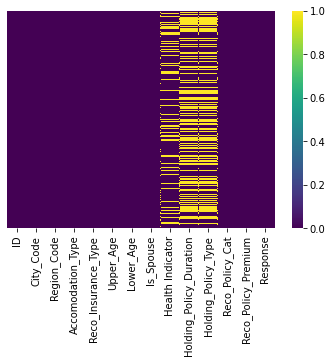

In [8]:
sns.heatmap(train_data.isnull(),yticklabels=False,cmap="viridis")

### Holding_Policy_Cat,Holding_Policy_Type,Health Indicator contains Null values. So we need to check amount of missing values.

In [9]:
# Number of of null values in each column
count=round(train_data.isnull().sum(),2)
percent=round((train_data.isnull().sum()/train_data.shape[0])*100,2)
data=pd.concat([count,percent],axis=1)
data.reset_index(inplace=True)
data.rename(columns={0: 'Missing Values Count',1: 'Missing Values %'},inplace=True)
data[data['Missing Values Count']!=0]

,index,Missing Values Count,Missing Values %
8,Health Indicator,11691,22.98
9,Holding_Policy_Duration,20251,39.80
10,Holding_Policy_Type,20251,39.80


## Null values Imputations

In [10]:
train_data["Health Indicator"].isnull().sum()

11691

In [11]:
test_data["Health Indicator"].isnull().sum()

5027

### While dealing with Health Indicator these indicators are taken from users. As for null values the user has not inputed any data . So we can take mode of previous values.

In [12]:
train_data['Health Indicator'].fillna(train_data['Health Indicator'].mode()[0], inplace=True)
test_data['Health Indicator'].fillna(test_data['Health Indicator'].mode()[0], inplace=True)

### The null vaues for holding policy Duration &  Type means there is non extisting customer.So, we can fill the NA by Zero.

In [13]:
train_data["Holding_Policy_Duration"].fillna(0,inplace=True)
test_data["Holding_Policy_Duration"].fillna(0,inplace=True)


In [14]:
train_data["Holding_Policy_Type"].fillna(0,inplace=True)
test_data["Holding_Policy_Type"].fillna(0,inplace=True)


In [15]:
train_data["Holding_Policy_Duration"]=train_data["Holding_Policy_Duration"].replace('14+','15')

In [16]:
test_data.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
dtype: int64

<AxesSubplot:xlabel='Accomodation_Type', ylabel='count'>

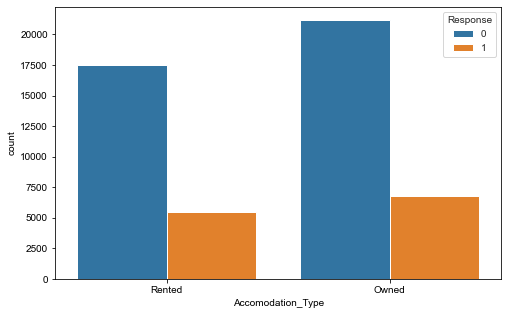

In [17]:
ax=plt.subplots(figsize=(8,5))
sns.set_style("whitegrid")
sns.countplot(x="Accomodation_Type",hue='Response',data=train_data)

### Both rented and owned owners shows same responses

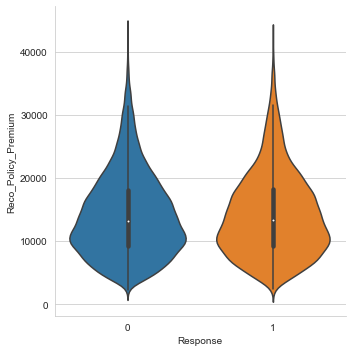

In [19]:
sns.catplot(x="Response",y="Reco_Policy_Premium",kind="violin",data=train_data)

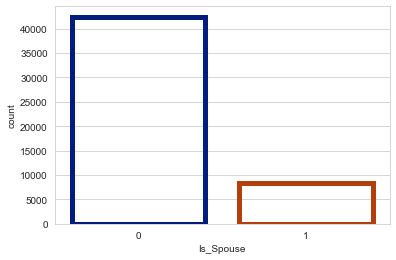

In [102]:
ax = sns.countplot(x="Is_Spouse", data=train_data,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

### Applying Label Encoder to both train & test data

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lef=LabelEncoder()

In [27]:
train_data["City_Code"]=LabelEncoder().fit_transform(train_data["City_Code"])

In [28]:
train_data["Accomodation_Type"]=LabelEncoder().fit_transform(train_data["Accomodation_Type"])

In [29]:
train_data["Reco_Insurance_Type"]=lef.fit_transform(train_data["Reco_Insurance_Type"])

In [30]:
train_data["Is_Spouse"]=train_data["Is_Spouse"].map({"Yes":1,"No":0})

In [31]:
train_data["Health Indicator"]=lef.fit_transform(train_data["Health Indicator"])

In [1]:
train_data["Holding_Policy_Duration"]=train_data["Holding_Policy_Duration"].astype(int)

NameError: name 'train_data' is not defined

In [34]:
test_data["City_Code"]=LabelEncoder().fit_transform(test_data["City_Code"])

In [35]:
test_data["Accomodation_Type"]=LabelEncoder().fit_transform(test_data["Accomodation_Type"])

In [36]:
test_data["Reco_Insurance_Type"]=lef.fit_transform(test_data["Reco_Insurance_Type"])

In [37]:
test_data["Is_Spouse"]=test_data["Is_Spouse"].map({"Yes":1,"No":0})

In [38]:
test_data["Holding_Policy_Duration"]=test_data["Holding_Policy_Duration"].replace('14+','15')

In [39]:
test_data["Health Indicator"]=lef.fit_transform(test_data["Health Indicator"])

In [40]:
test_data["Holding_Policy_Duration"]=test_data["Holding_Policy_Duration"].astype(int)

In [42]:
X=train_data.drop('Response',axis=1)

In [43]:
Y=train_data["Response"]

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=4)

## Model Buildings

In [46]:
## Hyperparameter optimization using RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [47]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}


In [48]:
classifier=xgboost.XGBClassifier()

In [49]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [50]:
random_search.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   53.9s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='warn', n_iter=5, n_jobs=-1,
                   param_distributions={'co

In [51]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  int32  
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  int32  
 4   Reco_Insurance_Type      50882 non-null  int32  
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  int64  
 8   Health Indicator         50882 non-null  int32  
 9   Holding_Policy_Duration  50882 non-null  int32  
 10  Holding_Policy_Type      50882 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int32(5

In [52]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1,monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
classifier.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
from sklearn.model_selection import cross_val_score
XGB_accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Mean_XGB_Acc : ", XGB_accuracies.mean())

Mean_XGB_Acc :  0.7582614924518392


In [55]:
xg_preds = classifier.predict(X_test)

In [56]:
from sklearn import metrics

In [57]:
print(metrics.classification_report(Y_test, xg_preds))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     11676
           1       0.35      0.00      0.00      3589

    accuracy                           0.76     15265
   macro avg       0.56      0.50      0.43     15265
weighted avg       0.67      0.76      0.66     15265



In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
clf = DecisionTreeClassifier()

In [60]:
clf = clf.fit(X_train,Y_train)

In [61]:
DT_accuracies = cross_val_score(estimator = clf, X = X_train, y = Y_train, cv = 10)
print("Mean_DT_Acc : ", DT_accuracies.mean())

Mean_DT_Acc :  0.6573266819517258


In [62]:
DT_pred = clf.predict(X_test)

In [63]:
print("Accuracy:",metrics.accuracy_score(Y_test, DT_pred))

Accuracy: 0.6594169669177857


In [64]:
clf1= DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [65]:
clf1 = clf1.fit(X_train,Y_train)

In [66]:
DTE_accuracies = cross_val_score(estimator = clf1, X = X_train, y = Y_train, cv = 10)
print("Mean_DTE_Acc : ", DTE_accuracies.mean())

Mean_DTE_Acc :  0.7579245872963088


In [67]:
DTE_pred = clf.predict(X_test)

In [68]:
print("Accuracy:",metrics.accuracy_score(Y_test,DTE_pred))

Accuracy: 0.6594169669177857


## KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn=KNeighborsClassifier(n_neighbors=7)


In [71]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [72]:
knn_accuracies = cross_val_score(estimator = knn, X = X_train, y = Y_train, cv = 10)
print("knn_DTE_Acc : ", knn_accuracies.mean())

knn_DTE_Acc :  0.7254399736618911


In [73]:
knn_pred=knn.predict(X_test)

In [74]:
print("KNN_Accuracy:",metrics.accuracy_score(Y_test,knn_pred))

KNN_Accuracy: 0.7281362594169669


In [75]:
print(metrics.classification_report(Y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84     11676
           1       0.22      0.06      0.10      3589

    accuracy                           0.73     15265
   macro avg       0.49      0.50      0.47     15265
weighted avg       0.64      0.73      0.67     15265



In [89]:
test_data_pred =knn.predict(test_data)

In [92]:
test_data_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
sub_fn=test_data.iloc[:,0:1].copy()

In [93]:
sub_fn["Prediction"]=pd.DataFrame(test_data_pred)

In [97]:
sub_fn

,ID,Prediction
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0


In [98]:
sub_fn.to_csv('final_submission.csv')

In [87]:
subm.drop('Predicted',axis=1,inplace=True)

In [88]:
subm

,id,Prediction
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0


In [106]:
subm.to_csv('avj_final_submission.csv')
